In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c instacart-market-basket-analysis

 98% 192M/196M [00:02<00:00, 77.3MB/s]
100% 196M/196M [00:02<00:00, 72.7MB/s]


In [ ]:
!unzip -q instacart-market-basket-analysis.zip

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#garbage collector
import gc
gc.enable() #enabling collection

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
print("Unzipping ...")
!unzip  'aisles.csv.zip'
!unzip  'departments.csv.zip'
!unzip  'order_products__prior.csv.zip'
!unzip  'order_products__train.csv.zip'
!unzip  'orders.csv.zip'
!unzip  'products.csv.zip'
!unzip  'sample_submission.csv.zip'
print(". done")

Unzipping ...
Archive:  aisles.csv.zip
  inflating: aisles.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._aisles.csv   
Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
Archive:  order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  
Archive:  order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  
Archive:  orders.csv.zip
  inflating: orders.csv              
  inflating: __MACOSX/._orders.csv   
Archive:  products.csv.zip
  inflating: products.csv            
  inflating: __MACOSX/._products.csv  
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
. done


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [ ]:
# Check row counts
print("aisles:", aisles.shape[0], "| missing values = ", 100*(aisles.shape[0]-aisles.dropna().shape[0])/aisles.dropna().shape[0], "%")
print("departments:", departments.shape[0], "| missing values = ", 100*(departments.shape[0]-departments.dropna().shape[0])/departments.dropna().shape[0], "%")
print("order_products__prior:", order_products__prior.shape[0], "| missing values = ", 100*(order_products__prior.shape[0]-order_products__prior.dropna().shape[0])/order_products__prior.dropna().shape[0], "%")
print("order_products__train:", order_products__train.shape[0], "| missing values = ", 100*(order_products__train.shape[0]-order_products__train.dropna().shape[0])/order_products__train.dropna().shape[0], "%")
print("orders:", orders.shape[0], "| missing values = ", 100*(orders.shape[0]-orders.dropna().shape[0])/orders.dropna().shape[0], "%")
print("products:", products.shape[0], "| missing values = ", 100*(products.shape[0]-products.dropna().shape[0])/products.dropna().shape[0], "%")

aisles: 134 | missing values =  0.0 %
departments: 21 | missing values =  0.0 %
order_products__prior: 32434489 | missing values =  0.0 %
order_products__train: 1384617 | missing values =  0.0 %
orders: 3421083 | missing values =  6.414217166831421 %
products: 49688 | missing values =  0.0 %


## EDA

In [ ]:
print("Total number of products = ", len(np.unique(order_products__train['product_id'])))
products.head()

Total number of products =  39123


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
print("Total number of orders = ", len(np.unique(order_products__train['order_id'])))
orders.head()

Total number of orders =  131209


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
user_products = pd.merge(left = order_products__train, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

In [ ]:
histogram_fig = px.histogram(user_products.groupby(['user_id']).agg({'order_id': 'count'}).reset_index(),
                             x='order_id',
                             title='Distribution of number of orders placed by users')
histogram_fig.update_layout(xaxis_title='Number of Orders', yaxis_title='Count of Users')

histogram_fig.show()

In [ ]:
histogram_fig = px.histogram(user_products.groupby(['order_id']).agg({'reordered': 'sum'}).reset_index(),
                             x='reordered',
                             title='Distribution of number of products re-ordered')
histogram_fig.update_layout(xaxis_title='Number of Re-orders', yaxis_title='Count of Re-orders')

histogram_fig.show()

In [ ]:
num_prods = user_products.groupby(['product_id']).agg({'order_id': 'count'}).reset_index()
histogram_fig = px.histogram(num_prods[num_prods.order_id<100],
                             x='order_id',
                             title='Distribution of number of times a product has been ordered')
histogram_fig.update_layout(xaxis_title='Number of Orders for a Product', yaxis_title='Count of Products')

histogram_fig.show()

In [ ]:
print("Number of products reordered = ", 100*order_products__train.groupby(['product_id']).agg({'reordered': 'max'}).reordered.sum()/len(order_products__train.groupby(['product_id'])), "%")

Number of products reordered =  77.13109935332157 %


In [ ]:
# most products ordered
most_ordered = order_products__train.groupby(['product_id']).agg({'order_id': 'count'}).reset_index().sort_values(by='order_id', ascending=False).reset_index(drop = 'True')
most_ordered = pd.merge(left = most_ordered.head(20), right = products.drop(['aisle_id', 'department_id'], axis = 1),
                             left_on='product_id', right_on='product_id').reset_index(drop=True)
fig = px.bar(most_ordered, x='product_name', y='order_id',
                    title='Top 20 Products Ordered')
fig.update_layout(xaxis_title='Products', yaxis_title='Count')
fig.show()

In [ ]:
# most products re-ordered
most_ordered = order_products__train.groupby(['product_id']).agg({'reordered': 'sum'}).reset_index().sort_values(by='reordered', ascending=False).reset_index(drop = 'True')
most_ordered = pd.merge(left = most_ordered.head(20), right = products.drop(['aisle_id', 'department_id'], axis = 1),
                             left_on='product_id', right_on='product_id').reset_index(drop=True)
fig = px.bar(most_ordered, x='product_name', y='reordered',
                    title='Top 20 Products Re-ordered')
fig.update_layout(xaxis_title='Products', yaxis_title='Count')
fig.show()

In [ ]:
histogram_fig = px.histogram(user_products.groupby(['user_id']).agg({'days_since_prior_order': 'min'}).reset_index(),
                             x='days_since_prior_order',
                             title='Recency - Histogram')
histogram_fig.update_layout(xaxis_title='Days since Last Order', yaxis_title='Count')

histogram_fig.show()

In [ ]:
histogram_fig = px.histogram(user_products.groupby(['user_id']).agg({'order_number': 'max'}).reset_index(),
                             x='order_number',
                             title='Frequency - Histogram')
histogram_fig.update_layout(xaxis_title='Number of Orders', yaxis_title='Count')

histogram_fig.show()

In [ ]:
histogram_fig = px.histogram(user_products.groupby(['user_id']).agg({'product_id': 'count'}).reset_index(),
                             x='product_id',
                             title='Monetary - Histogram')
histogram_fig.update_layout(xaxis_title='Number of Products Bought', yaxis_title='Count')

histogram_fig.show()

## Pre-Processing

In [ ]:
# Considering 1000 users for processing convenience

orders = orders[orders.user_id<=1000].dropna().reset_index()

In [ ]:
prior_train_orders = pd.merge(left = order_products__prior, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

del aisles, departments, order_products__prior, order_products__train, orders

In [ ]:
prior_train_orders.head()

,order_id,product_id,add_to_cart_order,reordered,index,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,40,10070,1,1,6226,382,prior,29,1,15,23.0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,40,33198,3,1,6226,382,prior,29,1,15,23.0,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages
2,40,42450,2,1,6226,382,prior,29,1,15,23.0,Macaroni & Cheese,38,1,frozen meals,frozen
3,40,34866,4,1,6226,382,prior,29,1,15,23.0,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
4,178,6369,2,0,15615,971,prior,2,3,11,19.0,Chunky Peanut Butter,88,13,spreads,pantry


## Clustering

In [ ]:
rfm_df = prior_train_orders[['user_id', 'days_since_prior_order', 'order_number', 'product_id']]
rfm_df = rfm_df.groupby(['user_id']).agg({
                                          'days_since_prior_order': 'max',
                                          'order_number': 'max',
                                          'product_id': 'count',
                                      }).reset_index()
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

In [ ]:
!pip install scikit-learn-extra

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

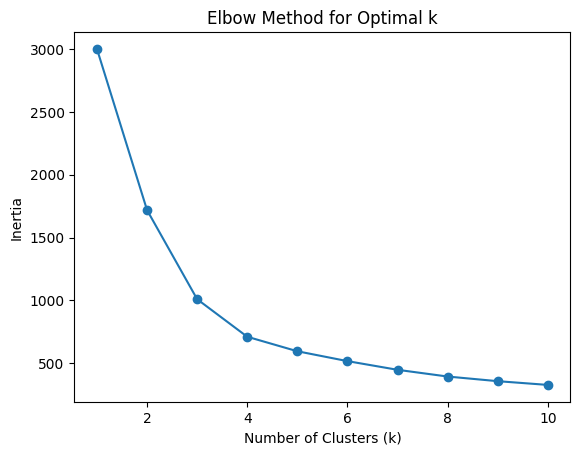

In [ ]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Scatter plot for 2D visualization (Recency vs Frequency)
fig = px.scatter(rfm_df, x='Recency', y='Frequency', color='Cluster', title='RFM Clustering - Recency vs Frequency')
fig.update_traces(marker=dict(size=5))  # Set your desired colors
fig.show()


In [ ]:
# 3D scatter plot for 3D visualization (Recency, Frequency, Monetary)
fig_3d = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster',
                       title='RFM Clustering - 3D Visualization')
fig_3d.show()

In [ ]:
# Apply KMedoids clustering
kmedoids = KMedoids(n_clusters=4, random_state=42)
rfm_df['Cluster_PAM'] = kmedoids.fit_predict(rfm_scaled)

# Visualize the clusters using Plotly
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster_PAM',
                    title='PAM Clustering - 3D Visualization')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).



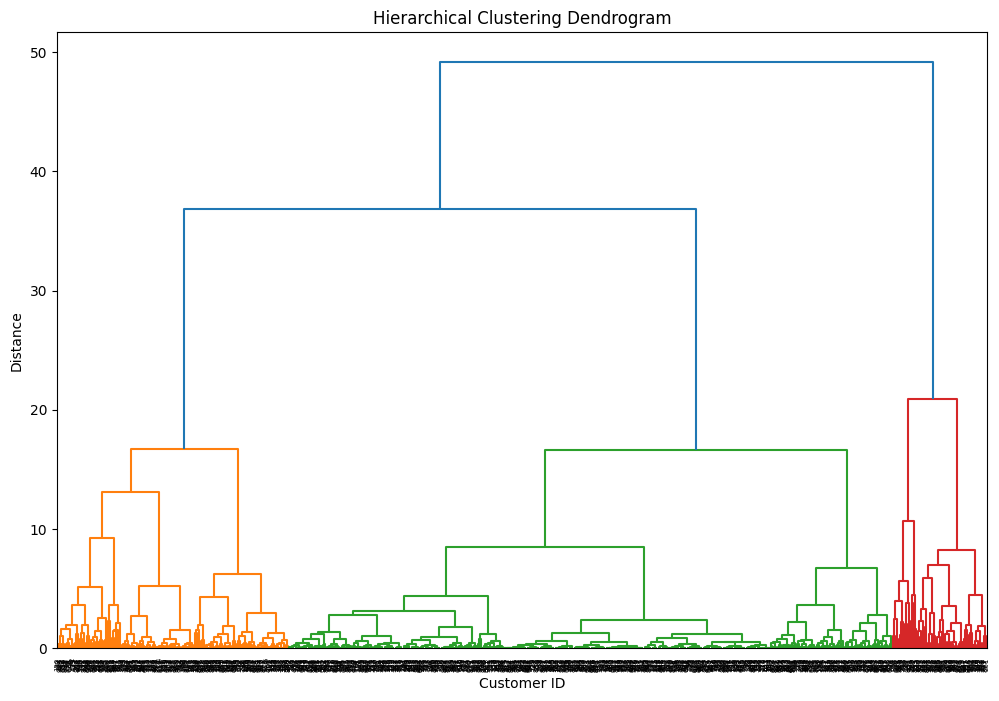

In [ ]:
# Apply hierarchical clustering
linkage_matrix = linkage(rfm_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=rfm_df.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Cut the dendrogram to obtain clusters
num_clusters = 3  # You can choose the number of clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster assignments to the DataFrame
rfm_df['Cluster_Hierarchical'] = clusters

# Visualize the clusters using Plotly
import plotly.express as px
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster_Hierarchical',
                    title='Hierarchical Clustering - 3D Visualization', symbol='Cluster_Hierarchical')
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_kmeans = silhouette_score(rfm_scaled, rfm_df['Cluster'])
silhouette_avg_PAM = silhouette_score(rfm_scaled, rfm_df['Cluster_PAM'])
silhouette_avg_hclust = silhouette_score(rfm_scaled, rfm_df['Cluster_Hierarchical'])
print(f"Silhouette Score (K-Means): {silhouette_avg_kmeans}")
print(f"Silhouette Score (PAM): {silhouette_avg_PAM}")
print(f"Silhouette Score (Hierarchical Clustering): {silhouette_avg_hclust}")

Silhouette Score (K-Means): 0.5707139150592128
Silhouette Score (PAM): 0.459334917184009
Silhouette Score (Hierarchical Clustering): 0.5259242890934818


## Classification

In [ ]:
df_class = prior_train_orders[['user_id', 'product_id', 'add_to_cart_order', 'aisle_id', 'department_id', 'reordered']].dropna().reset_index(drop=True)

df_class = df_class.groupby(['user_id', 'product_id']).agg({
                                                  'add_to_cart_order': 'mean',
                                                  'aisle_id': 'max',
                                                  'department_id': 'max',
                                                  'reordered': 'max'
                                              }).reset_index()

df_class = df_class[df_class.user_id < 100]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = df_class[['user_id', 'product_id', 'add_to_cart_order', 'aisle_id', 'department_id']]
target = df_class['reordered']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['add_to_cart_order']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['user_id', 'product_id', 'add_to_cart_order', 'aisle_id', 'department_id'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
##################################
##################################
user_id = 57
product_ids = np.unique(X_train.product_id)
##################################
##################################

df = pd.DataFrame({
    'user_id': user_id,
    'product_id': product_ids
})
user_products = pd.merge(left = df, right = df_class[['product_id', 'add_to_cart_order', 'aisle_id', 'department_id']],
                             left_on='product_id', right_on='product_id').reset_index(drop=True)

user_products = user_products.groupby(['user_id', 'product_id']).agg({
                                      'add_to_cart_order': 'mean',
                                      'aisle_id': 'max',
                                      'department_id': 'max',
                                  }).reset_index()

user_products = user_products.drop_duplicates().reset_index(drop=True)
user_products_transformed = preprocessor.transform(user_products)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifier_svm = SVC(probability=True, random_state=42)

# Train the classifier on the transformed training data
classifier_svm.fit(X_train_transformed, y_train)

# Get predicted probabilities instead of binary predictions for the test data
y_pred_proba_svm = classifier_svm.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred_proba_svm > 0.5).astype(int))
conf_matrix = confusion_matrix(y_test, (y_pred_proba_svm > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba_svm > 0.5).astype(int))

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8166819431714024
Confusion Matrix:
[[649  12]
 [188 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       661
           1       0.95      0.56      0.71       430

    accuracy                           0.82      1091
   macro avg       0.86      0.77      0.79      1091
weighted avg       0.85      0.82      0.80      1091



In [ ]:
user_preds = classifier_svm.predict_proba(user_products_transformed)[:, 1]
user_products['reordered'] = user_preds
products_ordered = pd.merge(left = user_products.sort_values('reordered', ascending = False).head(20), right = products.drop(['aisle_id', 'department_id'], axis = 1),
                             left_on='product_id', right_on='product_id').reset_index(drop=True)

products_ordered.product_name.loc[:20]

0                           Organic Peach Lowfat Yogurt
1               Unsweet Strawberry Kiwi Sparkling Water
2                        Cran Raspberry Sparkling Water
3                             Fat Free Blueberry Yogurt
4     Almond Non-Dairy Yogurt Made From Real Almonds...
5                                       Coconut Yoghurt
6                          Organic Whole Grassmilk Milk
7                                 Sparkling Lemon Water
8                          Unsweetened Blackberry Water
9                        Organic Golden Delicious Apple
10                                    Honeycrisp Apples
11    Smooth Greens & Kale Vegetable and Fruit Juice...
12       Slim Can Pink Grapefruit Natural Mineral Water
13                                Organic Fat Free Milk
14                          2% Reduced Fat Organic Milk
15                    Organic Greek Plain Nonfat Yogurt
16                   Curate Cherry Lime Sparkling Water
17    VitaminWater Zero™ XXX Acai Blueberry Pome

In [ ]:
classifier_log = LogisticRegression(random_state=42)

# Train the classifier on the transformed training data
classifier_log.fit(X_train_transformed, y_train)

# Get predicted probabilities instead of binary predictions for the test data
y_pred_proba_log = classifier_log.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred_proba_log > 0.5).astype(int))
conf_matrix = confusion_matrix(y_test, (y_pred_proba_log > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba_log > 0.5).astype(int))

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8203483043079743
Confusion Matrix:
[[638  23]
 [173 257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       661
           1       0.92      0.60      0.72       430

    accuracy                           0.82      1091
   macro avg       0.85      0.78      0.80      1091
weighted avg       0.84      0.82      0.81      1091



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
user_preds = classifier_log.predict_proba(user_products_transformed)[:, 1]
user_products['reordered'] = user_preds
products_ordered = pd.merge(left = user_products.sort_values('reordered', ascending = False).head(20), right = products.drop(['aisle_id', 'department_id'], axis = 1),
                             left_on='product_id', right_on='product_id').reset_index(drop=True)

products_ordered.product_name.loc[:20]

0                           Organic Peach Lowfat Yogurt
1                                 Michigan Organic Kale
2                             Fat Free Blueberry Yogurt
3                          Unsweetened Blackberry Water
4                                         Honey Yoghurt
5     Dairy Free Coconut Milk Blueberry Yogurt Alter...
6                    Mango Rosewater Lassi Yogurt Drink
7                                 Sparkling Lemon Water
8                  The Original Five Cheese Texas Toast
9                        Organic Golden Delicious Apple
10                                         Organic Soba
11                    Grain Free Turkey Canned Cat Food
12                           Chicken Canned Kitten Food
13                 Lime Italian Sparkling Mineral Water
14                                Organic Fat Free Milk
15                         Passionfruit Sparkling Water
16                       Cran Raspberry Sparkling Water
17                              Plain Whole Milk

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)

# Train the classifier on the transformed training data
classifier_rf.fit(X_train_transformed, y_train)

# Get predicted probabilities instead of binary predictions for the test data
y_pred_proba_rf = classifier_rf.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred_proba_rf > 0.5).astype(int))
conf_matrix = confusion_matrix(y_test, (y_pred_proba_rf > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba_rf > 0.5).astype(int))

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


Accuracy: 0.8111824014665444
Confusion Matrix:
[[637  24]
 [182 248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       661
           1       0.91      0.58      0.71       430

    accuracy                           0.81      1091
   macro avg       0.84      0.77      0.78      1091
weighted avg       0.83      0.81      0.80      1091



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
user_preds = classifier_rf.predict_proba(user_products_transformed)[:, 1]
user_products['reordered'] = user_preds
products_ordered = pd.merge(left = user_products.sort_values('reordered', ascending = False).head(20), right = products.drop(['aisle_id', 'department_id'], axis = 1),
                             left_on='product_id', right_on='product_id').reset_index(drop=True)

products_ordered.product_name.loc[:20]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


0                                         Honey Yoghurt
1                                  Peanut Butter Cereal
2                                   Organic Rolled Oats
3                                   Coconut Oil Popcorn
4     Uncrustables Peanut Butter & Grape Jelly Sandwich
5                    Mango Rosewater Lassi Yogurt Drink
6                                                Paneer
7                          Passionfruit Sparkling Water
8                                            Pistachios
9     Dairy Free Coconut Milk Blueberry Yogurt Alter...
10                Organic Raw Walnut Banana Meals To-Go
11                                Cinnamon Toast Crunch
12                   Gluten Free Chocolate Chip Cookies
13                           Pop Up Bowl Butter Popcorn
14                       Ultra Thin Mild Cheddar Slices
15                       Chocolate Peppermint Stick Bar
16    Almond Non-Dairy Yogurt Made From Real Almonds...
17                           Natural Good Mornin